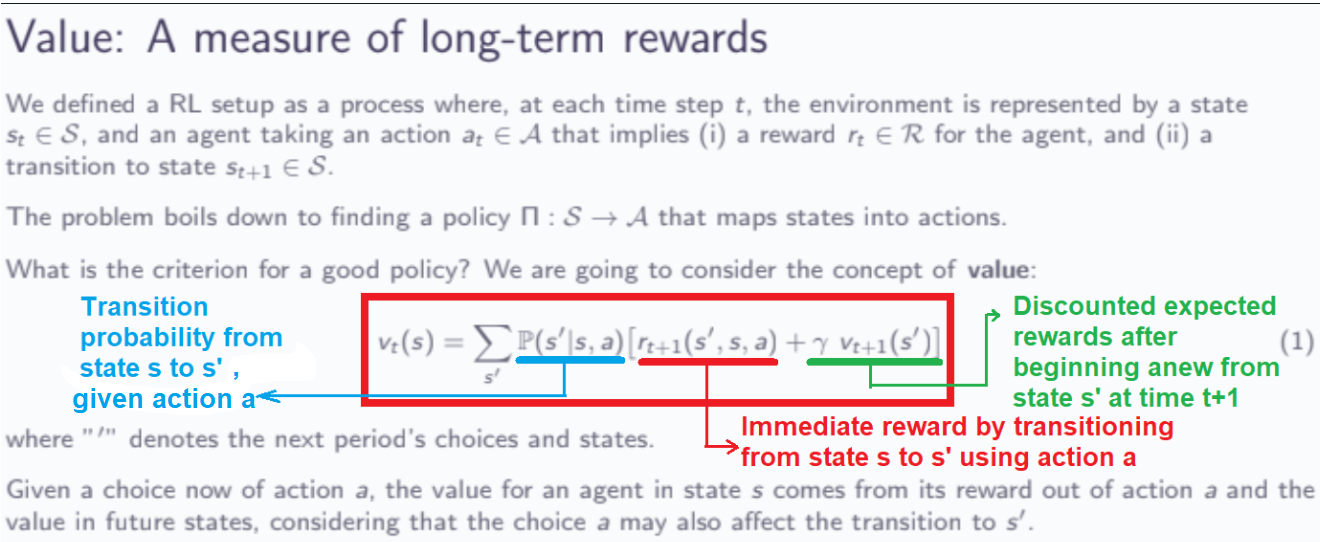

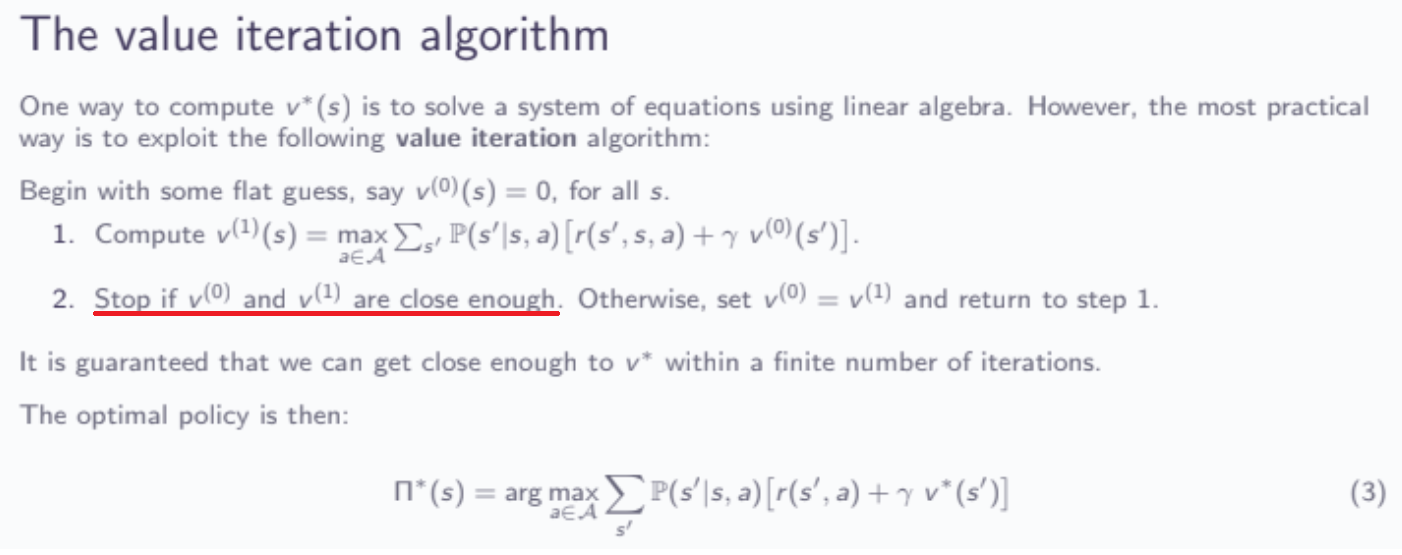

## **1. REINFORCEMENT LEARNING: DYNAMIC PROGRAMMING**

### **1.2 The Value Function**

From the previous module, notice that we defined a Reinforcement Learning setup as a process where, at each time step $t$, the environment is represented by a *state* $s_t\in\mathcal{S}$, an agent taking an action $a_t\in\mathcal{A}$ that implies (i) a reward $r_t\in\mathcal{R}$ for the agent, and (ii) a transition to state $s_{t+1}\in\mathcal{S}$. Assuming the Markov property, we have that:
*   $\mathbb{P}(s_{t+1}|s_{t},a_{t})=\mathbb{P}(s_{t+1}|s_{t},a_{t},...,s_{0},a_{0})$
*   $\mathbb{P}(r_{t}|s_{t},a_{t})=\mathbb{P}(r_{t}|s_{t},a_{t},...,s_{0},a_{0})$

This RL framework that imposes the Markov property is known as a Markov Decision Process (MDP). The agent must make decisions in a sequential manner, under what objective? The problem boils down to finding a policy $\Pi: \mathcal{S}\rightarrow\mathcal{A}$ that maps states into actions. We must find an action that is best to take now for each current realization of the state. Due to the Markov property, we must only take care of the current state and we can forget about past realizations.

What is the criterion to find a good policy? The key idea of DP, and of RL generally, is the use of value functions to organize and structure the search for good policies. In a dynamic environment, we should not just care about the current reward, so the problem is more complicated than choosing $a_t$ to maximize $r_t$. Indeed, we are going to consider an intertemporal criterion, defined as value:
$$
\begin{align}
v_t(s) = \sum_{s'}\mathbb{P}(s'|s,a) \big[ r_{t+1}(s',s,a) + \gamma\ v_{t+1}(s') \big]
\end{align}
$$
where "$'$" denotes the next period's choices and states. That is, given a choice now of action $a$, the value for an agent in state $s$ comes from its reward out of action $a$ and the value in future states, considering that the choice $a$ may also affect the future state $s'$. The parameter $\gamma\in(0,1)$ captures the extent to which current rewards are more relevant relative to more distant ones, i.e., it is a measure of the agent's patience. We can also refer to $\gamma$ as the *discount factor* of the agent.

Although we are going to cover a wide range of problems, let's first consider stationary problems with infinite-horizon. This means that the agent will take actions forever, albeit possibly with some terminal state(s). In a stationary setup, whenever the agent has stepped into state $s$, the expected length of the agent's life is the same as it was the previous time it reached $s$, and so the behavior is the same. With a stationary problem, we can get rid of the subindex $t$ in the value function:
$$
\begin{align}
v(s) = \sum_{s'}\mathbb{P}(s'|s,a) \big[ r(s',s,a) +  \gamma\ v(s') \big]
\end{align}
$$
Thus, the best policy would lead to the function:
$$
\begin{align}
v^*(s) = \underset{a\in\mathcal{A}}{\max}\sum_{s'}\mathbb{P}(s'|s,a) \big[ r(s',s,a) + \gamma\ v^*(s') \big]
\end{align}
$$
$v^*(s)$ is the optimal value function. The optimal value of a state $s$ is the maximum over all actions the agent can take including the current period's reward and the next state's optimal value. The idea is that, in every state, we want to choose the action that maximizes the value of the future.

Let $N$ denote the number of possible states in the Markov chain of the DP problem. <u> Notice that the equation above defines a system of $N$ equations, **one for each state**, and $N$ unknowns, each $v^*(s)$ </u>. Banach's fixed-point theorem guarantees that there exists a single optimal policy $v^*(s)$ for each $s$.

The optimal policy is, then:
$$
\begin{align}
\Pi^*(s) = \arg\underset{a\in\mathcal{A}}{\max}\sum_{s'}\mathbb{P}(s'|s,a) \big[  r(s',a) +  \gamma\ v^{*}(s')\big]
\end{align}
$$
### 1.3 Value Iteration

How do we compute $v^*$? One way is to solve the system of equations using linear algebra. However, the most practical way is to exploit the following value iteration algorithm:

Begin with some flat guess, say $v^{(0)}(s)=0$, for all $s$.
1. Compute $v^{(1)}(s) = \underset{a\in\mathcal{A}}{\max}\sum_{s'}\mathbb{P}(s'|s,a)\big[  r(s',s,a) +  \gamma\ v^{(0)}(s')\big]$.
2. Stop if $v^{(0)}$ and $v^{(1)}$ are close enough. Otherwise, set $v^{(0)}=v^{(1)}$ and return to step 1.

It is guaranteed that we can get close enough to $v^*$ within a finite number of iterations.

## 2. Optimal timing to sell an asset

Consider an investor that owns a financial asset, whose dividends $s_t\geq 0$ fluctuate randomly according to a Markov process that takes values in $\{s_1,...,s_N\}$, with $s_1=0$ being an absorbing state (say, bankruptcy and liquidation), and $s_i<s_{i+1}$ for $i=1,2,...,N$.

Suppose that the dividend Markov process is defined by the following transition matrix:
$$
\begin{align}
& \mathbb{P}(s_i|s_{i-1}) = \mathbb{P}(s_i|s_{i+1}) = 0.5\ \text{for}\ i=2,...,N-1 \\
& \mathbb{P}(s_{1}|s_{1}) = \mathbb{P}(s_{N-1}|s_{N}) = 1
\end{align}
$$
That is, at each date, dividends go up or down one step with equal probability, and the process always bounces back once it has reached the maximum level of dividends. As mentioned above, the state $s_1$ is absorbing.

An investor (the agent) currently holds the asset. At each point in time, the investor must choose to either hold the asset or sell it at a price $\ell$ to other investors, in which case the stream of dividends stops. Therefore, the action space is $\mathcal{A}=\{hold,sell\}$, and the rewards for the investor are $r(s)=s$ when the investor holds, $r(s)=\ell$ when the asset is sold, and $r(s)=0$ thereafter. Therefore, this means that $\mathbb{P}(s_i|s_j,sell)=0$ for all $j$ and $i\neq 1$, and $\mathbb{P}(s_1|s_j,sell)=1$ for all $j$. In contrast, the investor's actions leave the underlying Markov process unchanged unless they decide to sell the asset, formally $\mathbb{P}(s'|s,hold)=\mathbb{P}(s'|s)$.

Let's find the optimal solution to this problem through value iteration.

In [354]:
# Import libraries to use in this notebook
import matplotlib.pyplot as plt
import numpy as np

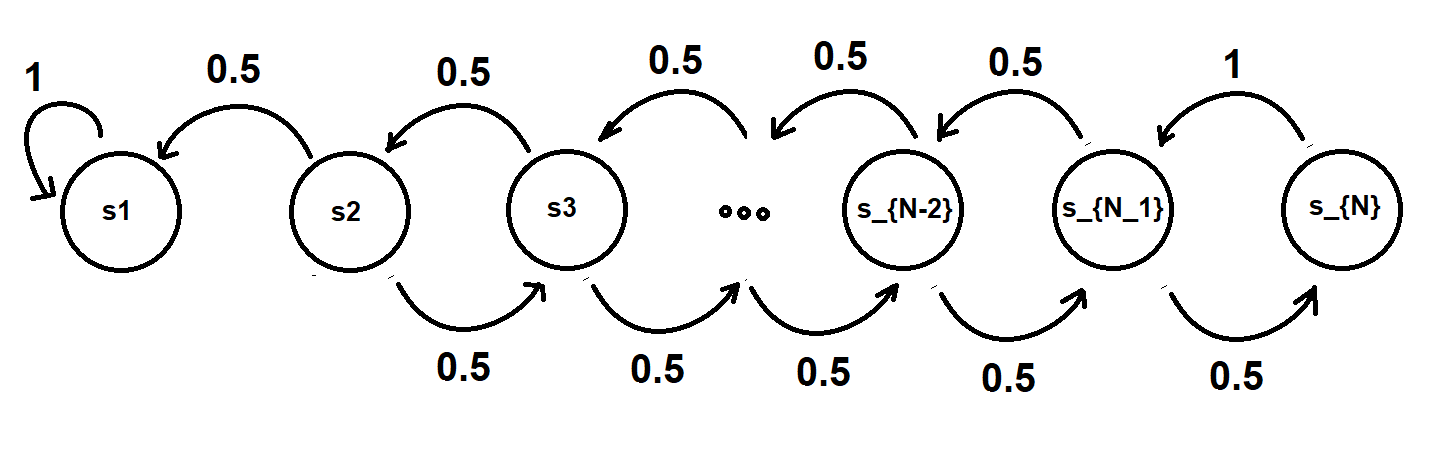

In [355]:
# SOLVING THE INVESTOR'S PROBLEM
# Step 1. Set up the dividend Markov process
N = 11  # Number of dividend states
A = (0, 1)  # action space, 0 is hold, 1 is sell
S_MIN = 0.0  # Minimum dividend
S_MAX = 10.0  # Maximum dividend
S_GRID = np.linspace(S_MIN, S_MAX, N)[np.newaxis, :]  # Array of possible dividend realizations

# Transition matrix
P = np.zeros((N, N))

# absorbing state, which always transitions to itself
P[0, 0]  = 1
P[0, 1:] = 0

# last state, which always transitions into the previous state
P[-1, -2] = 1
P[-1, -1] = 0
P[-1, :-2] = 0

for s in range(1, N-1):
    P[s, s-1] = 0.5
    P[s, s+1] = 0.5

In [356]:
S_GRID  # dividend payments

array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]])

In [357]:
S_GRID.shape

(1, 11)

In [358]:
# SOLVING THE INVESTOR'S PROBLEM
# Step 2. Set up the parameters of the DP problem
gamma = 0.75
sellprice = 15.0  # sell price

epsilon = 1e-4
max_iterations = 200

In [359]:
# rewards tensor
R = np.repeat(S_GRID, N, axis=0)

"""
If you sell, you automatically go to state 0 with probability 1.
"""
R

array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]])

In [360]:
# SOLVING THE INVESTOR'S PROBLEM
# Step 1. Set up the dividend Markov process
N = 11  # Number of dividend states
A = (0, 1)  # action space, 0 is hold, 1 is sell
S_MIN = 0.0  # Minimum dividend
S_MAX = 10.0  # Maximum dividend
S_GRID = np.linspace(S_MIN, S_MAX, N)[np.newaxis, :]  # Array of possible dividend realizations

# Transition matrix
P = np.zeros((N, N))

# absorbing state, which always transitions to itself
P[0, 0]  = 1
P[0, 1:] = 0

# last state, which always transitions into the previous state
P[-1, -2] = 1
P[-1, -1] = 0
P[-1, :-2] = 0

for s in range(1, N-1):
    P[s, s-1] = 0.5
    P[s, s+1] = 0.5

print("P:\n", P)

# rewards array
R = np.repeat(S_GRID, N, axis=0)  # assuming hold

# SOLVING THE INVESTOR'S PROBLEM
# Step 2. Set up the parameters of the DP problem
gamma = 0.75
sellprice = 15.0  # sell price

epsilon = 1e-4
max_iterations = 200

P:
 [[1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.5 0.  0.5 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.5 0.  0.5 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.  0.5 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.5 0.  0.5 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.5 0.  0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.5 0.  0.5 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.5 0.  0.5 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.5 0.  0.5 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.  0.5]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0. ]]


In [361]:
R

array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]])

In [362]:
# Iteration
def v(s):
    v = 0  # initialize value function value to 0.
    iter_count = 0
    for i in range(max_iterations):
        iter_count += 1
        # print(f"---- Iteration {i} ----")
        v_old = v
        v = np.maximum((P[s, :] * (R[s, :] + gamma*v_old)).sum(), sellprice)
        # print("P[s, :] * (R[s, :] =", P[s, :] * (R[s, :]))
        # print("    v =", np.round(v, 2))
        
        if np.abs(v - v_old).max() < epsilon:
            print("Iteration count:", iter_count)
            if v == sellprice:
                print("Optimal policy: SELL")
            else:
                print("Optimal policy: HOLD")
            return v

In [363]:
np.set_printoptions(precision=2, suppress=True)

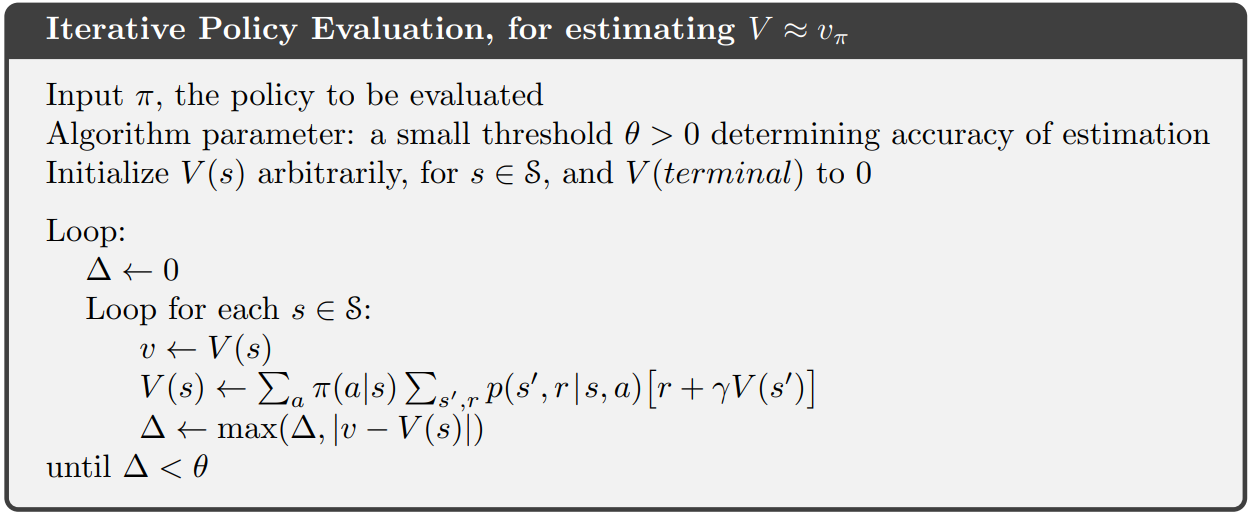

In [364]:
def value_iteration():
    v = np.zeros(N)  # Initialize value function for all states
    policy = np.zeros(N, dtype=int)  # Policy initialization (0 = hold, 1 = sell)

    for i in range(max_iterations):
        v_old = v.copy()
        for s in range(N):
            hold_value = np.dot(P[s, :], R[s, :] + gamma * v_old)
            sell_value = sellprice
            v[s] = max(hold_value, sell_value)
            policy[s] = np.argmax([hold_value, sell_value])
        
        # Check convergence
        if np.max(np.abs(v - v_old)) < epsilon:
            print(f"Converged after {i+1} iterations")
            break

    return v, policy

v, policy = value_iteration()
print("v =")
print(v)
print("policy =")
print(policy)

Converged after 37 iterations
v =
[15.   15.   15.   15.14 17.38 20.53 24.04 27.58 30.83 33.3  33.98]
policy =
[1 1 1 0 0 0 0 0 0 0 0]


<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:14: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:14: SyntaxWarning: invalid escape sequence '\p'
C:\Users\adevr\AppData\Local\Temp\ipykernel_25084\3790490601.py:8: SyntaxWarning: invalid escape sequence '\p'
  axs[1].set_title("$\pi(s)$, optimal policy given state s")
C:\Users\adevr\AppData\Local\Temp\ipykernel_25084\3790490601.py:14: SyntaxWarning: invalid escape sequence '\p'
  axs[1].set_ylabel("$\pi(s)$")


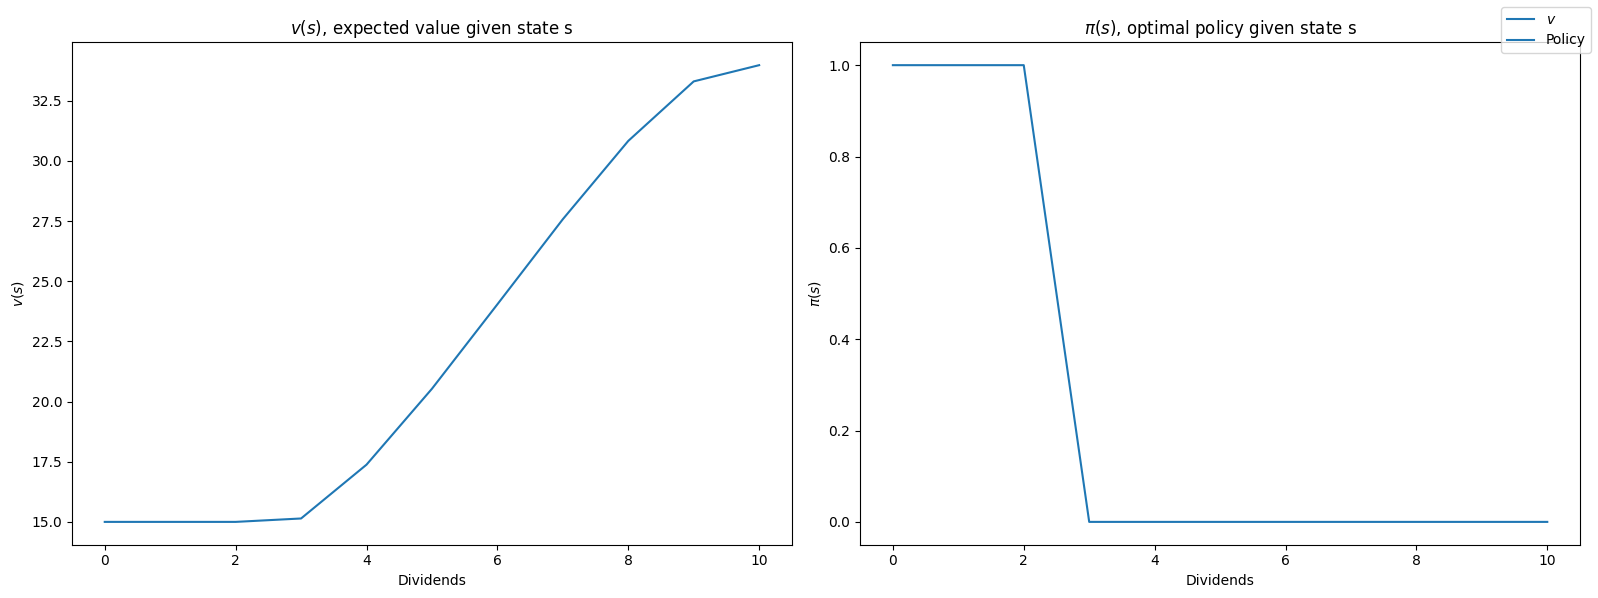

In [365]:
# Plotting

fig, axs = plt.subplots(1, 2, figsize=(16, 6))
axs[0].plot(S_GRID.flatten(), v, label="$v$")
axs[1].plot(S_GRID.flatten(), policy, label="Policy")

axs[0].set_title("$v(s)$, expected value given state s")
axs[1].set_title("$\pi(s)$, optimal policy given state s")

axs[0].set_xlabel("Dividends")
axs[1].set_xlabel("Dividends")

axs[0].set_ylabel("$v(s)$")
axs[1].set_ylabel("$\pi(s)$")

fig.tight_layout()
fig.legend()

___________

# Q-function

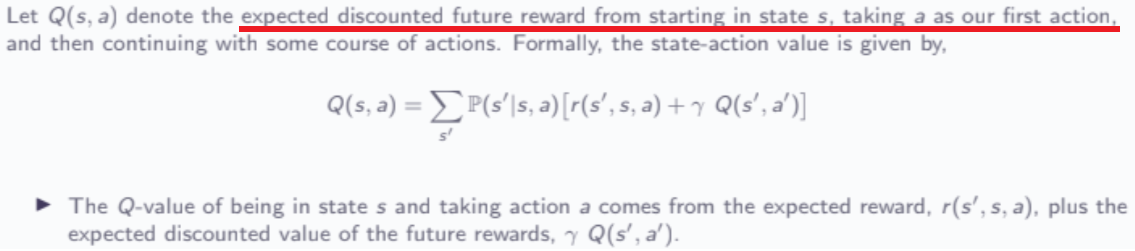

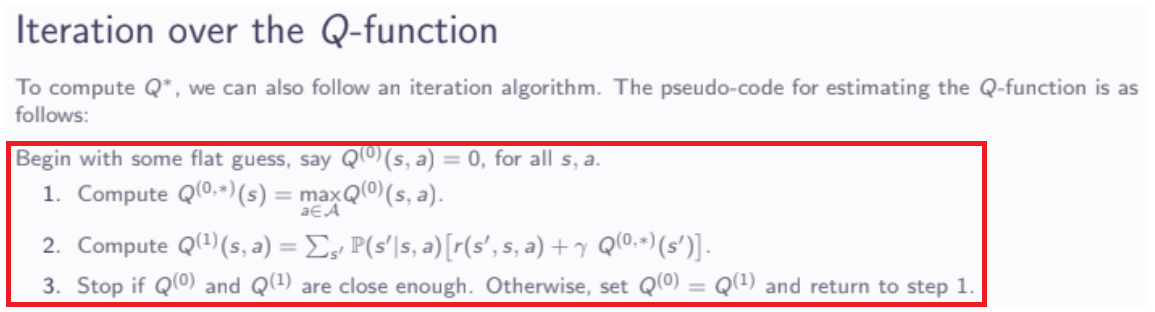

## **1. Q-Function**

While value function iteration is a useful algorithm, RL setups mostly consider an alternative tool to take us to the optimal actions.

Let $Q(s,a)$ denote the expected discounted future reward from starting in state $s$, taking $a$ as our first action, and <u> then continuing optimally </u>. This function is similar to $v$, except that $Q$ specifies the first action, and that action could potentially be sub-optimal (we are going to compute $Q$ for each possible action in each state). Formally,
$$
\begin{align}
Q(s,a) = \sum_{s'}\mathbb{P}(s'|s,a) \big[ r(s',s,a) +  \gamma\ Q(s',a') \big]
\end{align}
$$
The $Q$-value of being in state $s$ and taking action $a$ as the reward, $r(s',s,a)$, plus the discounted expected value of the future rewards. We get the expected value of the future by taking an expectation over all possible next states, $s'$. In each state $s'$, we need to know the value of behaving optimally. We can get that by choosing, in each $s'$, the action $a'$ that maximizes $Q(s',a')$, so that we reach the optimal function:
$$
\begin{align}
Q^*(s,a) = \sum_{s'}\mathbb{P}(s'|s,a) \big[ r(s',s,a) +  \gamma\ \underset{a'\in\mathcal{A}}{\max} Q^*(s',a') \big]
\end{align}
$$
A convenient aspect of this approach is that if you know $Q^*$, then it is easy to compute the optimal action in a state:
$$
\begin{align}
\Pi^*(s) = \arg\underset{a\in\mathcal{A}}{\max} Q^*(s,a)
\end{align}
$$
All you have to do is take the action that gives the largest $Q$-value in that state. We can sketch the iteration over the $Q$-function as follows:

Begin with some flat guess, say $Q^{(0)}(s,a)=0$, for all $s,a$.
1. Compute $Q^{(0,*)}(s) = \underset{a\in\mathcal{A}}{\max}Q^{(0)}(s,a)$.
2. Compute $Q^{(1)}(s,a) = \sum_{s'}\mathbb{P}(s'|s,a)\big[ r(s',s,a) +  \gamma\ Q^{(0,*)}(s')\big]$.
3. Stop if $Q^{(0)}$ and $Q^{(1)}$ are close enough. Otherwise, set $Q^{(0)}=Q^{(1)}$ and return to step 1.

In [366]:
max_iters = 200

A = (0, 1)  # 0 is hold, 1 is sell
S = np.arange(11)  # dividend payments as both states and rewards 0, ..., 10
N = len(S)
epsilon = 1e-4

gamma = 0.75  # discount factor
sell_price = 15

# Transition probabilities
P = np.zeros((N, N))
P[0, 0] = 1  # absorbing state
P[-1, -2] = 1  # last state 10 always transitions into 9
for s in S[1:-1]:
    P[s, [s-1, s+1]] = 0.5

In [367]:
# Calculate OPTIMUM value functions by iteration
def value_iteration():
    num_iters = 0
    v = np.zeros(N)
    for _ in range(max_iters):
        num_iters += 1
        old_v = v.copy()
        for s in S:
            # Immediate reward is the current dividend S[s] !!
            v[s] = np.maximum(S[s] + gamma * np.dot(P[s, :], v), sell_price)  # S[s] is the immediate reward if holding. Else, sell_price is the immediate reward!
        if np.abs(old_v - v).max() < epsilon:  # optimality reached
            break
    print(f"Optimum v reached after {num_iters} iterations")
    return v

Optimum v reached after 22 iterations
optimal v = [15.   15.   15.   15.15 17.39 20.56 24.1  27.72 31.14 33.98 35.49]


(5.0, 38.48856877155717)

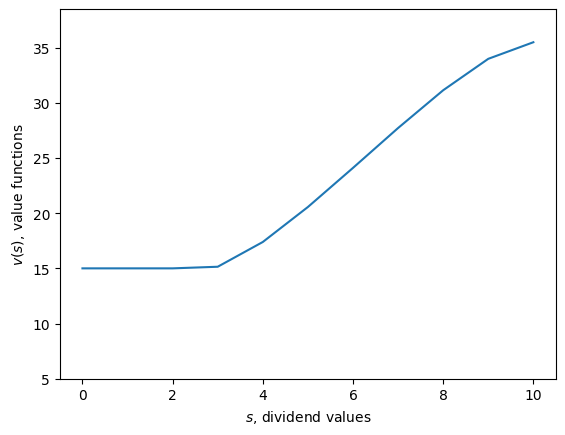

In [368]:
optimal_v = value_iteration()
print("optimal v =", optimal_v)
plt.plot(optimal_v)
plt.xlabel("$s$, dividend values")
plt.ylabel("$v(s)$, value functions")
plt.ylim((5, optimal_v.max() + 3))

In [369]:
A = (0, 1)

# Calculate OPTIMUM value functions by iteration
def q_iteration():
    num_iters = 0
    # Initialize the Q-value array
    Q = np.zeros((N, len(A)))
    for _ in range(max_iters):
        num_iters += 1
        old_q_values = Q.copy()
        for s in S:
            Q[s, 0] = S[s] + gamma * np.dot(P[s, :], np.maximum(Q[:, 0], Q[:, 1]))  # we take the OPTIMAL ACTION a for the FUTURE Q values.
            Q[s, 1] = sell_price
        if np.abs(Q - old_q_values).max() < epsilon:
            print(f"Convergence after {num_iters} iterations.")
            return Q

In [370]:
optimum_Q = q_iteration()
optimum_Q

Convergence after 22 iterations.


array([[11.25, 15.  ],
       [12.25, 15.  ],
       [13.3 , 15.  ],
       [15.15, 15.  ],
       [17.39, 15.  ],
       [20.56, 15.  ],
       [24.1 , 15.  ],
       [27.72, 15.  ],
       [31.14, 15.  ],
       [33.98, 15.  ],
       [35.49, 15.  ]])

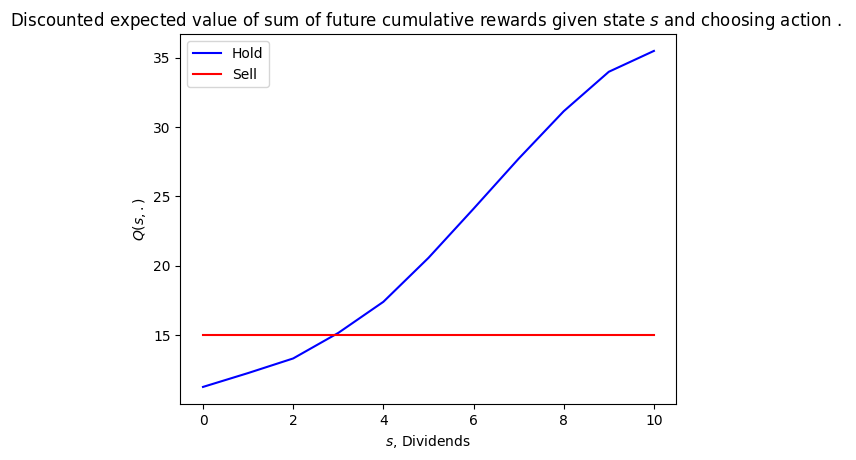

In [371]:
plt.plot(optimum_Q[:, 0], label="Hold", c="b")
plt.plot(optimum_Q[:, 1], label="Sell", c="r")
plt.title("Discounted expected value of sum of future cumulative rewards given state $s$ and choosing action $.$ ")
plt.ylabel("$Q(s, .)$")
plt.xlabel("$s$, Dividends")
plt.legend()

_______________

Let's keep on studying the tools of dynamic programming with the following problem.

## **2. A Gambler's Problem**

A gambler has the opportunity to make bets on the outcomes of a sequence of coin flips. If the coin comes up heads, the gambler wins as many
dollars as they bet on that flip. If tails, they lose their bet. The game ends when the gambler wins by reaching a target of \$100 or loses by running out of money. On each flip, the gambler must decide what portion of their capital to put at stake, in integer numbers of dollars.

The state is the gambler's capital, $s\in\{0, 1, 2,..., 99, 100\}$ and the actions are stakes, $a\in\{1, . . . , \min(s, 100− s)\}$. The reward is zero on all transitions except those on which the gambler reaches their goal, when it is +1. Because the gambler just cares about the terminal value of the game, either reaching \$100 or \$0, we can forget about the discounting parameter $\gamma$.

The value function of this game then will return the optimal probability of winning from each state. A policy maps each level of capital accumulated by the gambler to a given bet. If $p_H$ denotes the probability of the coin coming up heads and is known, then the entire problem is known and it can be solved, for instance, by value iteration.

In [372]:
import pandas as pd

N = 101  # number of states
max_iters = 200
epsilon = 1e-4

# States
S = np.arange(101)  # states are also the current cash of the gambler

# Probability
p = 0.4  # probability of Heads

# Calculate OPTIMUM value functions by iteration
def value_iteration_gambler():
    num_iters = 0
    v = np.zeros(N)
    policy = np.zeros(N)
    for _ in range(max_iters):
        num_iters += 1
        old_v = v.copy()
        for s in S:
            if s == 0:
                v[s] = 0  # termination
            elif s == 100:
                v[s] = 1
            else:
                # Given s, the possible action space is:
                A = np.arange(1, np.minimum(s, 100-s)+1)
                # print("A =", A)
                v_s_dict = {}
                for a in A:
                    v_s_dict[a] = p*(0 + v[s+a]) + (1-p)*(0 + v[s-a])
                v_s = pd.Series(v_s_dict)
                # print("v_s =\n", v_s)
                v[s] = np.max(v_s)  # optimum v[s]
                policy[s] = v_s.idxmax()  # optimum policy for s
                # print("-"*50)

        if np.abs(old_v - v).max() < epsilon:  # optimality reached
            break
    print(f"Optimum v reached after {num_iters} iterations")
    return v, policy

In [373]:
v, policy = value_iteration_gambler()
v

Optimum v reached after 10 iterations


array([0.  , 0.  , 0.01, 0.01, 0.01, 0.02, 0.02, 0.03, 0.03, 0.04, 0.04,
       0.05, 0.06, 0.07, 0.07, 0.07, 0.08, 0.09, 0.09, 0.1 , 0.11, 0.12,
       0.13, 0.13, 0.14, 0.16, 0.16, 0.17, 0.17, 0.18, 0.19, 0.19, 0.2 ,
       0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.26, 0.27, 0.28, 0.29, 0.3 ,
       0.31, 0.32, 0.33, 0.35, 0.36, 0.38, 0.4 , 0.4 , 0.41, 0.41, 0.42,
       0.43, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.5 , 0.51,
       0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.59, 0.6 , 0.62, 0.64, 0.64,
       0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.74, 0.75, 0.77,
       0.79, 0.8 , 0.81, 0.82, 0.83, 0.85, 0.87, 0.88, 0.9 , 0.92, 0.94,
       0.96, 1.  ])

Text(0.5, 0, 'Capital')

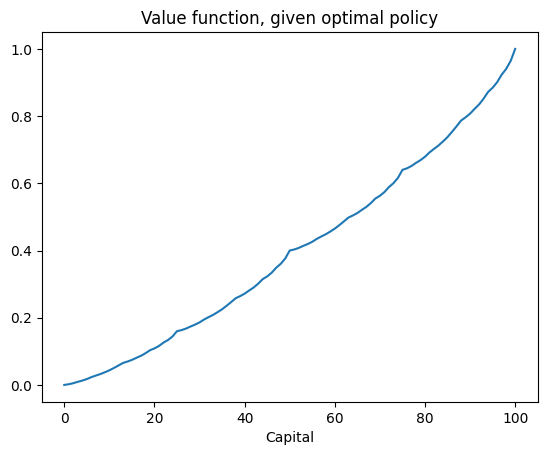

In [374]:
plt.plot(v)
plt.title("Value function, given optimal policy")
plt.xlabel("Capital")

Text(0.5, 0, 'Capital')

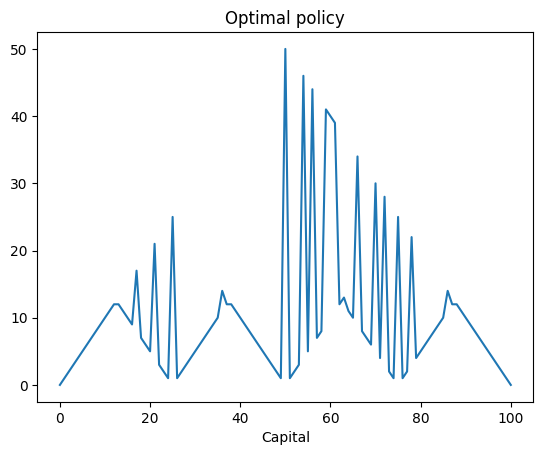

In [375]:
plt.plot(policy)
plt.title("Optimal policy")
plt.xlabel("Capital")

_______________

# Policy Iteration

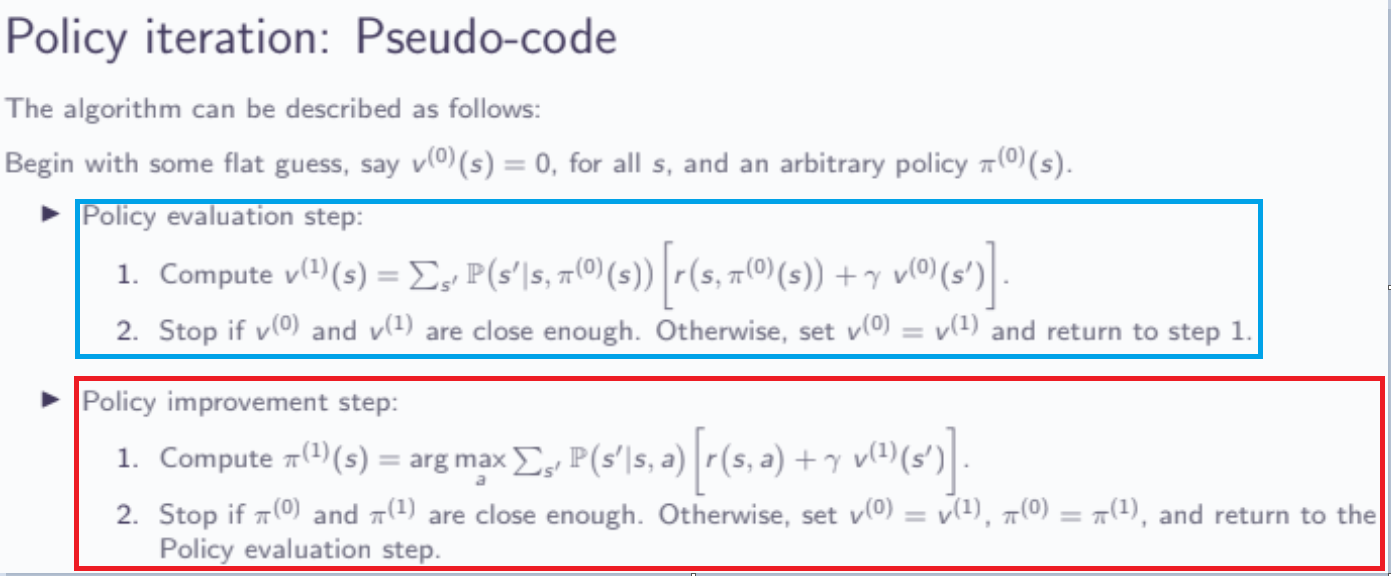

_________________

## **2. The Gridworld**

The figure below displays a $4\times4$ grid. The problem for the agent is to follow directions from each cell to reach the terminal state by ending up in any of the shaded cells. We can set up the state-space as $\mathcal{S}=\{0,1,2...,14, 15\}$ where 0 denotes the terminal state. Cells 0 and 15 generate the same reward, so there is no need to formally define them separately. Notwithstanding, in our code below, we are going to explicitly differentiate between them. 

The agent can take four actions, $\mathcal{A}=\{up,down,right,left\}$. The reward in each transition is -1 until the terminal state is reached. Thus, the problem for the agent is to find the minimum distance from any cell to either of the shaded cells.

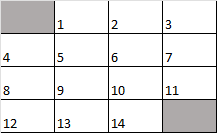

We are going to describe step by step the solution to the gridworld problem with policy iteration. However, the first challenging task in this problem is to determine the transitions across states. Because the agent has full control of the directions to follow, the transitions are deterministic given each choice. The block of code below creates a matrix that determines, for each position and action, which is the destination cell. For ease of coding, it is now useful to create two different states for states 0 and 15. Notice that the code is general enough to admit different sizes of the gridworld, $N$, as long as it is square. 

In [376]:
# q iter with stochastic policy
def q_iteration_gridworld_stoch():
    iter_count = 0
    
    # States
    S = np.arange(0, 16)
    S = S.astype(np.int32)

    N = len(S)
    max_iters = 200
    epsilon = 1e-4
            
    # Possible actions
    A = np.array([0, 1, 2, 3])  # up, right, down, left

    # Row index is current state, col index is current action taken
    S_prime = np.zeros((N, len(A)), dtype=np.int32)
    S_prime[0, :] = 0
    S_prime[-1, :] = 15
    S_prime[3, :] = np.array([3, 3, 7, 2])
    S_prime[12, :] = np.array([8, 13, 12, 12])
    
    for s in [1, 2]:
        S_prime[s, :] = np.array([s, s+1, s+4, s-1])
        
    for s in [7, 11]:
        S_prime[s, :] = np.array([s-4, s, s+4, s-1])
        
    for s in [13, 14]:
        S_prime[s, :] = np.array([s-4, s+1, s, s-1])
    
    for s in [4, 8]:
        S_prime[s, :] = np.array([s-4, s+1, s+4, s])
        
    for s in [5, 6, 9, 10]:
        S_prime[s, :] = np.array([s-4, s+1, s+4, s-1])
    
    Q = np.zeros((N, len(A)))
    policy = np.zeros(N, dtype=np.int32)

    for _ in range(max_iters):
        iter_count += 1
        Q_old = Q.copy()
        for s in S:
            for a in A:
                dest = S_prime[s, a]
                # print(f"dest={dest} at iteration {iter_count}:")
                if dest in [0, 15]:
                    Q[s, :] = -1
                    policy[s] = a
                else:
                    Q[s, a] = -1 + (Q[dest, :]).max()
            policy[s] = (Q[s, :]).argmax()

        if np.abs(Q - Q_old).max() < epsilon:
            print(f"Converged after {iter_count} iterations.")
            return Q, policy
    raise ValueError("Did not converge.")

In [377]:
Q, policy = q_iteration_gridworld_stoch()
Q

Converged after 5 iterations.


array([[-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-3., -4., -4., -2.],
       [-4., -4., -3., -3.],
       [-1., -3., -3., -2.],
       [-2., -4., -4., -2.],
       [-3., -3., -3., -3.],
       [-4., -3., -2., -4.],
       [-2., -4., -4., -3.],
       [-3., -3., -3., -3.],
       [-4., -2., -2., -4.],
       [-1., -1., -1., -3.],
       [-3., -3., -4., -4.],
       [-4., -2., -3., -4.],
       [-1., -1., -2., -3.],
       [-1., -1., -1., -1.]])

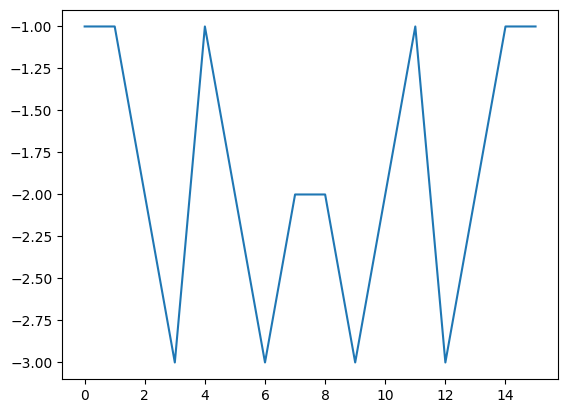

In [378]:
plt.plot(Q.max(axis=1))

In [379]:
def q_iteration_gridworld():
    iter_count = 0
    
    # Parameters
    N = 16  # Number of states
    max_iters = 200
    epsilon = 1e-4
    gamma = 1.0  # Discount factor
    
    # States and Actions
    S = np.arange(N)
    A = [0, 1, 2, 3]  # Up, Right, Down, Left
    num_actions = len(A)
    
    # Initialize transition function
    grid_size = 4
    S_prime = np.zeros((N, num_actions), dtype=int)
    for s in range(N):
        row, col = divmod(s, grid_size)
        for a in A:
            if s == 0 or s == 15:
                S_prime[s, a] = s  # Terminal states
            else:
                next_row, next_col = row, col
                if a == 0 and row > 0:  # Up
                    next_row = row - 1
                elif a == 1 and col < grid_size - 1:  # Right
                    next_col = col + 1
                elif a == 2 and row < grid_size - 1:  # Down
                    next_row = row + 1
                elif a == 3 and col > 0:  # Left
                    next_col = col - 1
                next_s = next_row * grid_size + next_col
                S_prime[s, a] = next_s
    
    # Initialize Q-values and policy
    Q = np.zeros((N, num_actions))
    policy = np.zeros(N, dtype=int)
    
    # Q-iteration
    for _ in range(max_iters):
        iter_count += 1
        Q_old = Q.copy()
        for s in range(N):
            if s == 0 or s == 15:
                Q[s, :] = 0  # Terminal states
            else:
                for a in A:
                    dest = S_prime[s, a]
                    reward = -1  # Step cost
                    Q[s, a] = reward + gamma * np.max(Q_old[dest, :])
        # Convergence check
        if np.max(np.abs(Q - Q_old)) < epsilon:
            print(f"Converged after {iter_count} iterations.")
            break
    else:
        print("Did not converge within the maximum number of iterations.")
    
    # Extract optimal policy
    for s in range(N):
        policy[s] = np.argmax(Q[s, :])
    
    return Q, policy

In [380]:
Q, policy = q_iteration_gridworld()
Q

Converged after 5 iterations.


array([[ 0.,  0.,  0.,  0.],
       [-2., -3., -3., -1.],
       [-3., -4., -4., -2.],
       [-4., -4., -3., -3.],
       [-1., -3., -3., -2.],
       [-2., -4., -4., -2.],
       [-3., -3., -3., -3.],
       [-4., -3., -2., -4.],
       [-2., -4., -4., -3.],
       [-3., -3., -3., -3.],
       [-4., -2., -2., -4.],
       [-3., -2., -1., -3.],
       [-3., -3., -4., -4.],
       [-4., -2., -3., -4.],
       [-3., -1., -2., -3.],
       [ 0.,  0.,  0.,  0.]])

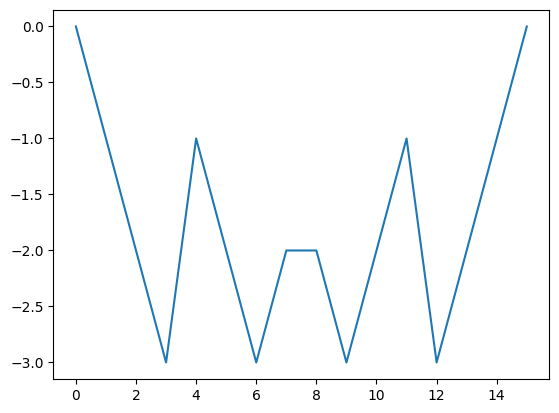

In [381]:
plt.plot(Q.max(axis=1))